In [1]:

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython import display
import pydotplus
# from time import sleep
#sleep(5)
#print('I love you darling')

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame({'X':[1,1,0,1],'Y':[1,1,0,0],'Z':[1,0,1,0],'Label':['A','A','B','B']})
df

# Here the label is: A and B 
# so we wanna predict whether is class_A or class_B

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

## X feature

## entropy formula:
#### __enropy = ∑ -p * log2(p)__

In [4]:
## For One
entropy_x_1 = (-2/3*np.log2(2/3)) + (-1/3*np.log2(1/3) )
print('entropy_x_1 =',entropy_x_1)

## For zero
entropy_x_0 = (-0/1*np.log2(0/1)) + (-1/1*np.log2(1/1))
print('entropy_x_0 =',entropy_x_0)

entropy_x_1 = 0.9182958340544896
entropy_x_0 = nan


## Y feature

In [5]:
## For One
entropy_y_1 = (-2/2*np.log2(2/2)) + (-0/2*np.log2(0/2) )
print('entropy_y_1 =',entropy_y_1)

## For zero
entropy_y_0 = (-0/2*np.log2(0/2)) + (-2/2*np.log2(2/2))
print('entropy_y_0 =',entropy_y_0)

entropy_y_1 = nan
entropy_y_0 = nan


In [6]:
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

## Z feature

In [7]:
## For One
entropy_z_1 = (-1/2*np.log2(1/2)) + (-1/2*np.log2(1/2) )
print('entropy_z_1 =',entropy_z_1)

## For zero
entropy_z_0 = (-1/2*np.log2(1/2)) + (-1/2*np.log2(1/2))
print('entropy_z_0 =',entropy_z_0)

entropy_z_1 = 1.0
entropy_z_0 = 1.0


## Finding __Information Gain__ using entropy

#### __Inf_Gain = 1 - ∑ sv/s * E__

In [8]:
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

In [9]:
#  1 -( for 1 for 0)

IG_X = 1 -(3/4*0.918 + 1/4 *0)
print('IG_X',IG_X)

#  1 -( for 1 for 0)

IG_Y = 1 -(2/4*0 + 2/4 *0)
print('IG_Y',IG_Y)
#  1 -( for 1 for 0)

IG_Z = 1 -(2/4*1 + 2/4 *1)
print('IG_Z',IG_Z)

IG_X 0.3115
IG_Y 1.0
IG_Z 0.0


##### From the above result the feature Y have higest __Information Gain (IG_X)__
##### Hence __Y__ will be choose as __Root node__ then  (Y << X < Z ) 



## Gini indexing
#### __Guini Impurity = 1 -∑ p2__

In [10]:
df1 = pd.DataFrame({ 'X':[17,2,10,11],'Y':[20,15,50,10],'Z':[10,5,20,25],'Label':['P','N','P','N']})
df1

X   Y   Z Label
0  17  20  10     P
1   2  15   5     N
2  10  50  20     P
3  11  10  25     N

## X feature

In [11]:
# Let's check for >= 10 (how many class is 'P')

# Toatl 3 data points ( >= 10 ).  2 Positve and 1 Negative
GX_gt_10 = 1 -(np.square(2/3) + np.square(1/3))
print('GX_gt_10= ',GX_gt_10)

# Toatl 1 data points ( < 10 ).  0 Positve and 1 Negative
GX_lt_10 = 1 -(np.square(0/1) + np.square(1/1))
print('GX_lt_10= ',GX_lt_10)


GX_gt_10=  0.4444444444444444
GX_lt_10=  0.0


In [12]:
# (Toatl 3 data points ( >= 10 )/ Toatl  data points in the dataset)*gini +
# (Toatl 1 data points ( < 10 )/ Toatl  data points in the dataset)*gini
 
gini_impurity_x = (3/4)*GX_gt_10 +(1/4)*GX_lt_10
print('gini_impurity_x=',gini_impurity_x)




gini_impurity_x= 0.3333333333333333


## Y feature

In [13]:
# Let's check for >= 23.75 (how many class is 'P')

# Toatl 1 data points ( >= 23.75 ).  1 Positve and 0 Negative
GY_gt_10 = 1 -(np.square(1/1) + np.square(0/1))
print('GY_gt_10= ',GY_gt_10)

# Toatl 3 data points ( < 23.75 ).  1 Positve and 2 Negative
GY_lt_10 = 1 -(np.square(1/3) + np.square(2/3))
print('GX_lt_10= ',GY_lt_10)

GY_gt_10=  0.0
GX_lt_10=  0.4444444444444444


In [14]:
# (Toatl 1 data points ( >= 23.75 )/ Toatl  data points in the dataset)*gini +
# (Toatl 3 data points ( < 23.75 )/ Toatl  data points in the dataset)*gini
 
gini_impurity_Y = (1/4)*GY_gt_10 +(3/4)*GY_lt_10
print('gini_impurity_Y=',gini_impurity_Y)


gini_impurity_Y= 0.3333333333333333


In [15]:
df1

X   Y   Z Label
0  17  20  10     P
1   2  15   5     N
2  10  50  20     P
3  11  10  25     N

## Z feature

In [16]:
# Let's check for >= 15 (how many class is 'P')

# Toatl 2 data points ( >= 15 ).  1 Positve and 1 Negative
GZ_gt_10 = 1 -(np.square(1/2) + np.square(1/2))
print('GZ_gt_10= ',GZ_gt_10)

# Toatl 2 data points ( < 15 ).  1 Positve and 1 Negative
GZ_lt_10 = 1 -(np.square(1/2) + np.square(1/2))
print('GZ_lt_10= ',GZ_lt_10)

GZ_gt_10=  0.5
GZ_lt_10=  0.5


In [17]:
# (Toatl 2 data points ( >= 15 )/ Toatl  data points in the dataset)*gini +
# (Toatl 2 data points ( < 15 )/ Toatl  data points in the dataset)*gini
 
gini_impurity_Z = (2/4)*GY_gt_10 + (2/4)*GZ_lt_10
print('gini_impurity_Z=',gini_impurity_Z)


gini_impurity_Z= 0.25


### If your features are __Categorical data__, then go for __Entropy__
### If your features are __Continuous data__, then go for __Gini__

## __Different Algorithm for Decision Tree__

 ### Algorithm __CART__

 ##### We will see the used of CART in following implementation

In [18]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
infos = 'https://raw.githubusercontent.com/olivierla412/Files/main/winequality_red.csv'

In [20]:
data = pd.read_csv(infos)

In [21]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [22]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [23]:
# Describe() method doesn't show categorical stats, we use isna() to check nulls values.
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Plotting Heatmap (Correlation matrix)

### __heatmap__ graph

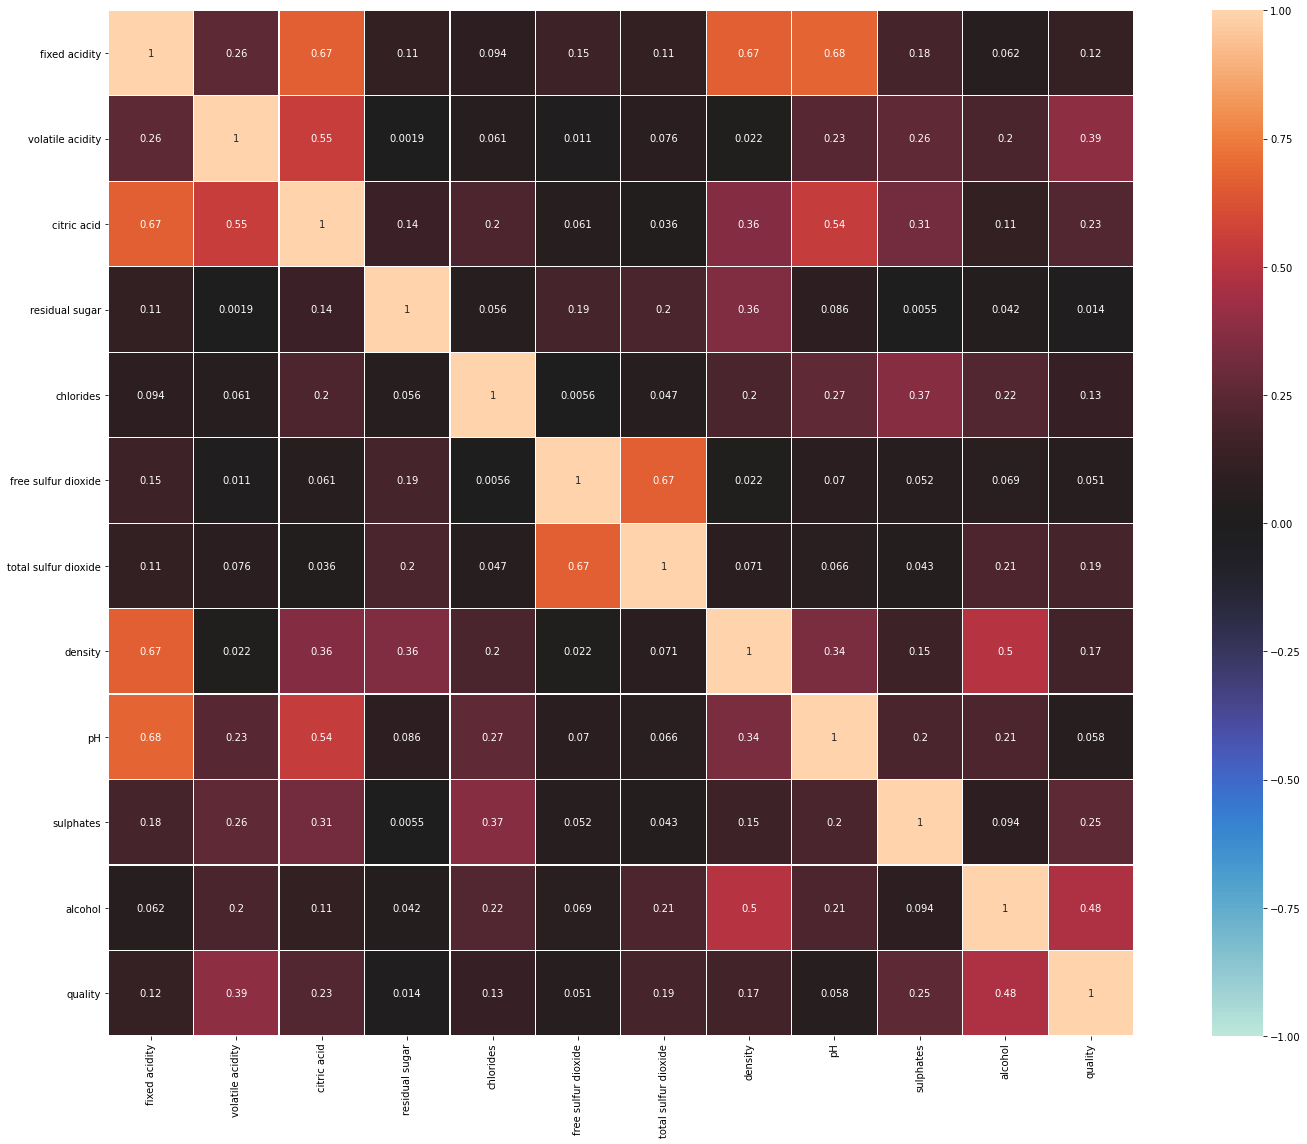

In [24]:
df_corr = data.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True,
           square=True,center=0,fmt='.2g',linewidths=.2,)
plt.tight_layout()

In [25]:
x = data.drop('quality',axis=1)
y = data['quality']

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=55)


In [27]:
# Let's first visualize the tree on the data without any preprocessing
clf = DecisionTreeClassifier()

In [28]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### Let's see how the tree looks like (This is nothing to do with the Algorithm/accuracy). It's is just for visualization purpose

In [29]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [30]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
# from time import sleep
#sleep(5)
#print('I love you darling')

In [31]:
# Create a dot_file which store the tree structure

dot_data = export_graphviz(clf,
                           feature_names=feature_name,
                           rounded=True,
                          filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('my_frist_Tree.png')

# shwo graph
Image(graph.create_png())

In [32]:
clf.score(x_train,y_train)

1.0

In [33]:
y_pred = clf.predict(x_test)

In [34]:
## accuracy of our classifiction tree

clf.score(x_test, y_test)

0.6025

### How to understand the confusion matrix for multi class ??


In [35]:
df_matrix= confusion_matrix(y_test,y_pred)
df_matrix

array([[  0,   0,   4,   0,   0,   0],
       [  0,   2,   7,   2,   1,   0],
       [  0,   2, 113,  41,   6,   1],
       [  1,   4,  51,  98,   9,   1],
       [  0,   2,   9,  13,  27,   1],
       [  0,   0,   0,   3,   1,   1]])

In [36]:
pd.DataFrame(df_matrix,
             columns=['Q3','Q4','Q5','Q6','Q7','Q8'],
             index=['Q3','Q4','Q5','Q6','Q7','Q8'])

Q3  Q4   Q5  Q6  Q7  Q8
Q3   0   0    4   0   0   0
Q4   0   2    7   2   1   0
Q5   0   2  113  41   6   1
Q6   1   4   51  98   9   1
Q7   0   2    9  13  27   1
Q8   0   0    0   3   1   1

## What are __hyper parameters?__

#### Exhaustive generation of combination of different parameters passed. Using cross validaton score, Grid Search returns the combination hyperparameters for which the model is performing the best.

In [50]:
# We are tuning three hyperparamters right now,
# we are passing the different values for both paramters

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2)
}


In [51]:
grid_search = GridSearchCV(estimator=clf,
                         param_grid=grid_param,
                         cv=5,
                         n_jobs=-1)

In [52]:
## again train the model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [53]:
# best parameters

best_parameters = grid_searh.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [101]:
## so let's build again the decisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',
                            max_depth=8,
                            min_samples_leaf=1,
                            min_samples_split=10)


In [102]:
## again train the model
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.57

In [103]:
# prediction of y_test values

y_pred = clf.predict(x_test)


In [104]:
## Accuracy of the model
accuracy_score(y_test,y_pred)

0.57

### Let's visualize again the result

In [105]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[6, 5, 7, 4, 3, 8]


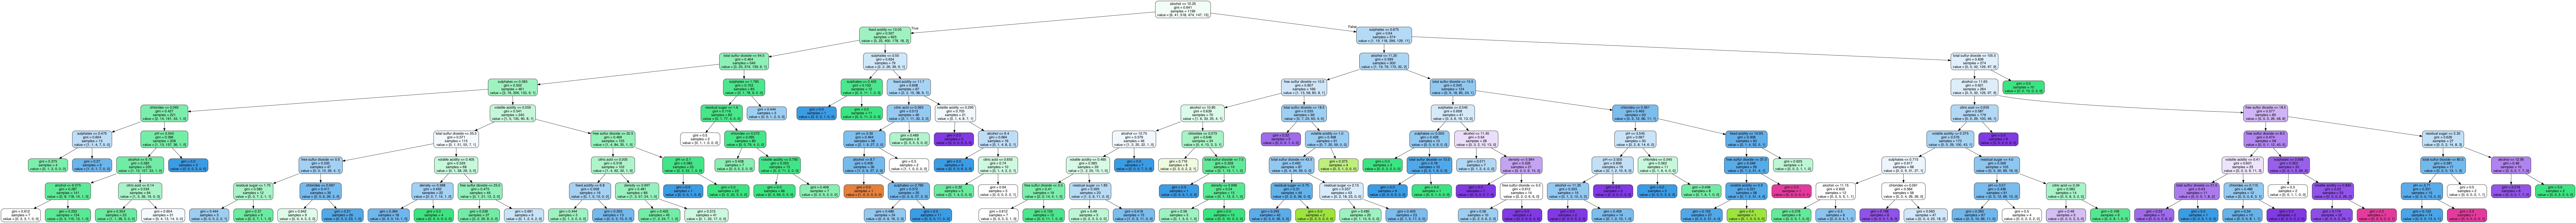

In [107]:
# Create a dot_file which store the tree structure

dot_data = export_graphviz(clf,
                           feature_names=feature_name,
                           rounded=True,
                          filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('depth_is_8_Tree.png')

# shwo graph
Image(graph.create_png())